<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Simple Linear Regression with Sacramento Real Estate Data - Sample Solution

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [4]:
shd = pd.read_csv('./sacramento_real_estate_transactions.csv')

In [3]:
import pandas as pd

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [5]:
# Check the dtypes.
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [6]:
# Zip code works better as a string object (categorical) so we will have to convert it.
shd['zip'] = shd['zip'].astype(str)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [7]:
# Check out the summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [8]:
shd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [9]:
# Check out the cities. Most cities have very few observations.
shd['city'].value_counts()

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
RANCHO MURIETA       3
WEST SACRAMENTO      3
GRANITE BAY          3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MATHER               1
GREENWOOD            1
MEADOW VISTA         1
PENRYN               1
FORESTHILL           1
SHINGLE SPRINGS      1
DIAMOND SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
Name: count, dtype: int64

In [10]:
# What could explain the houses with 0 bedrooms?
shd.loc[shd['beds']==0,'type'].value_counts()

type
Residential    99
Condo           8
Unkown          1
Name: count, dtype: int64

In [11]:
# What about the houses that are less than 0 dollars?
shd.loc[shd['price']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [12]:
# And the houses with negative square footage?
shd.loc[shd['sq__ft']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [13]:
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [14]:
# Let's check if any other values are labeled incorrectly.
shd.describe(include='all')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,985,985,985,985,985.000000,985.000000,985.000000,985,985,985.000000,985.000000,985.000000
unique,981,39,68,2,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,1223 LAMBERTON CIR,SACRAMENTO,95648,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,439,72,984,NaN,NaN,NaN,917,268,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.911675,1.776650,1312.918782,NaN,NaN,233715.951269,38.445121,-121.193371
std,NaN,NaN,NaN,NaN,1.307932,0.895371,856.123224,NaN,NaN,139088.818896,5.103637,5.100670
min,NaN,NaN,NaN,NaN,0.000000,0.000000,-984.000000,NaN,NaN,-210944.000000,-121.503471,-121.551704
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,950.000000,NaN,NaN,145000.000000,38.482704,-121.446119
50%,NaN,NaN,NaN,NaN,3.000000,2.000000,1304.000000,NaN,NaN,213750.000000,38.625932,-121.375799
75%,NaN,NaN,NaN,NaN,4.000000,2.000000,1718.000000,NaN,NaN,300000.000000,38.695589,-121.294893


In [15]:
# It looks like only one row is mislabeled, so we'll just drop that row.
shd.drop(index=703, inplace=True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

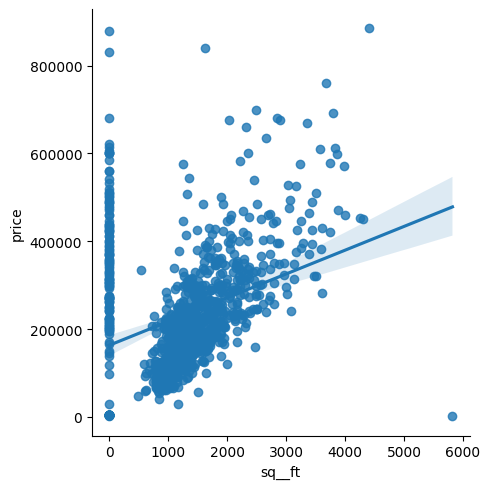

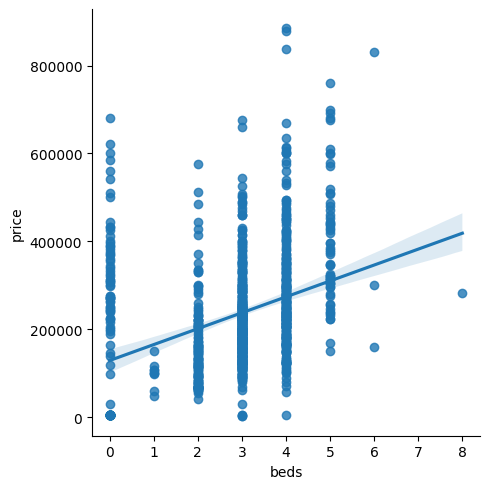

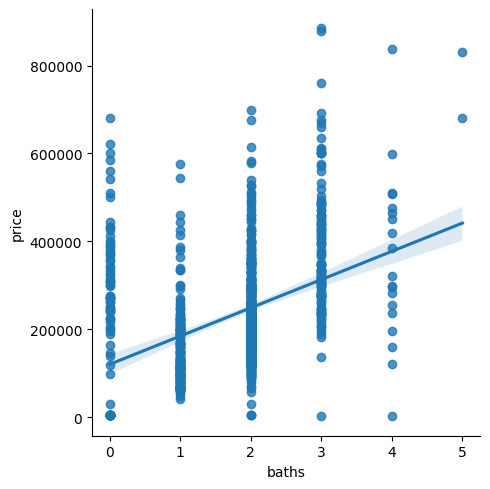

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

### 5. Build a Linear Regression model that will take in  `y` and `X`, and return the intercept and slope coefficients.. 

`y` is the target variable and `X` is the predictor variable.

- **Report the slope and intercept.**

In [21]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [66]:
X = shd[['sq__ft']]
y = shd['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [69]:
lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 6. Interpret the intercept. Interpret the slope.

In [70]:
lr.intercept_

np.float64(176288.3460094127)

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [71]:
lr.coef_

array([43.26882834])

### 8: [Bonus] Using the model you came up with in Problem 5, calculate the residuals.

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [72]:
X = shd[['sq__ft','zip','beds','baths']]
y = shd['price']

X = pd.get_dummies(columns = ['zip'], drop_first=True, data=X)

In [73]:
X = pd.get_dummies(columns= ['type'], drop_first=True, data=x)
X.head()

KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [74]:
lr = LinearRegression()
lr2  = LinearRegression()
lr.fit(X,y)
lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
lr2.intercept_

np.float64(176288.3460094127)

In [76]:
lr2.coef_

array([43.26882834])

In [80]:
y_pred = lr.predict(X)
y_pred2 = lr2.predict(X_test)

In [81]:
set(zip(X.columns, lr.coef_))
set(zip(X.columns, lr2.coef_))

{('sq__ft', np.float64(43.268828339874744))}

In [82]:
train_r2 = metrics.r2_score(y, y_pred)
test_r2 = metrics.r2_score(y_test, y_pred2)
print(train_r2)
print(test_r2)

0.5964730430835956
0.20050070964949307


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

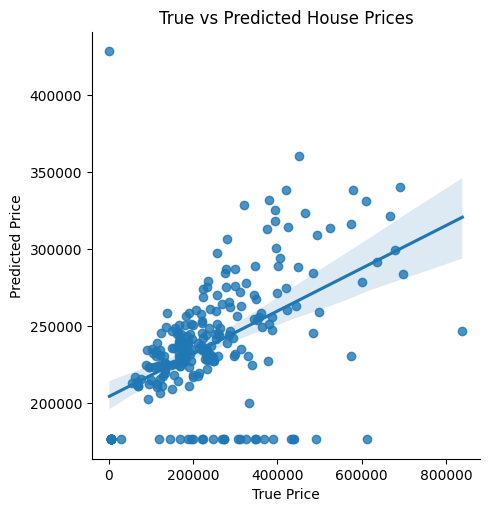

In [83]:
results = pd.DataFrame({'True Price': y_test, 'Predicted Price': y_pred2})
sns.lmplot(x='True Price', y='Predicted Price', data=results)

# Add title and labels
plt.title('True vs Predicted House Prices')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.show()

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# Normality:  Do the Residual Errors follow a normal distribution?



In [ ]:
# Equality of variance.  



### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

MSE, RMSE, R squared